In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import multivariate_normal
import joblib

import sys
sys.path.append('../')
from gaussian_search import GaussianProcessSearch

%load_ext autoreload
%autoreload 2

# 1. Define the example model

The logarithm of the model, typically assumed to be expensive to evaluate, which we would like to explore:

<IPython.core.display.Javascript object>


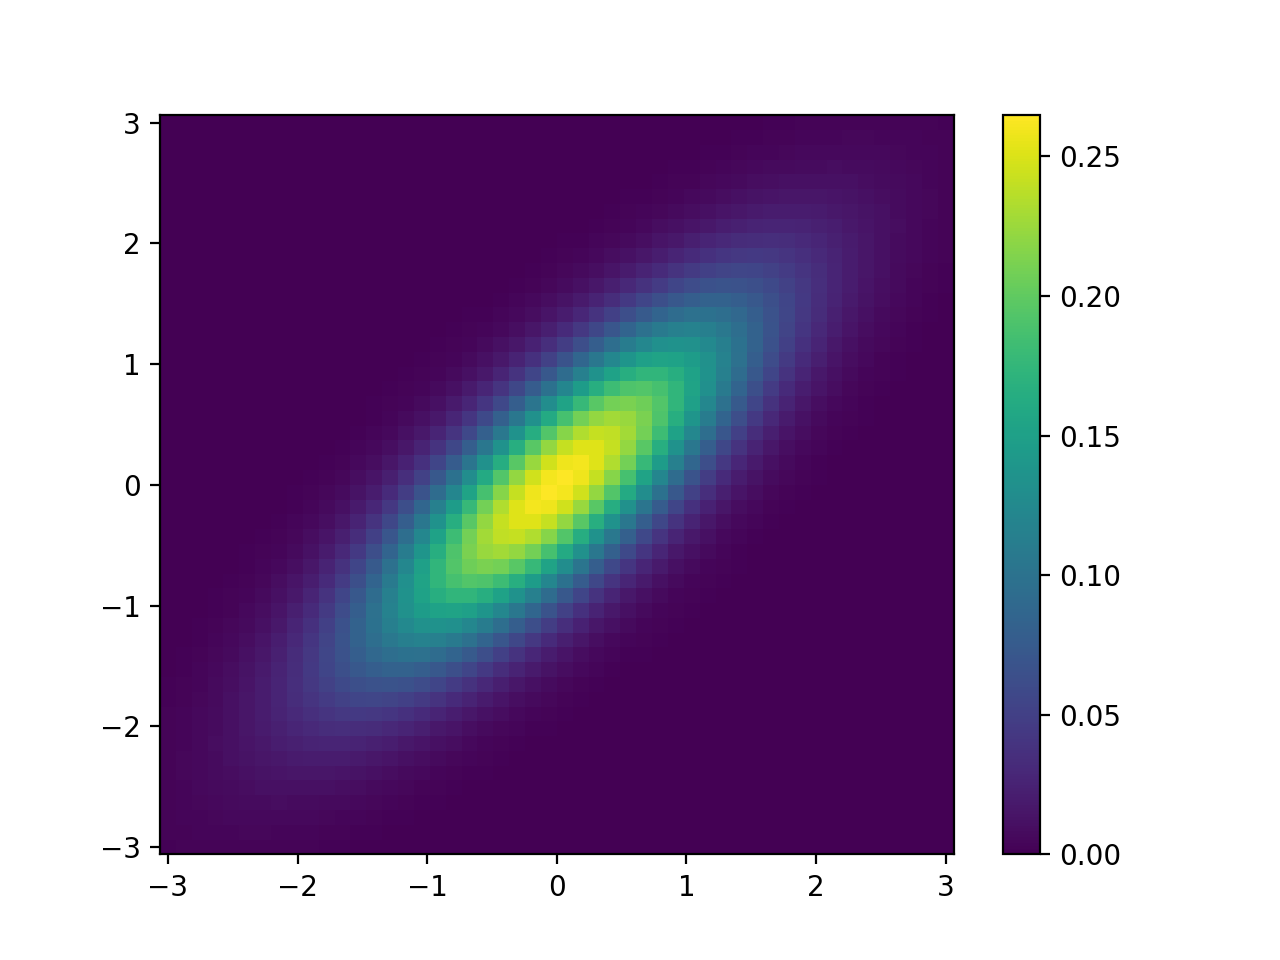

In [2]:
def model(point):
    x, y = point.values()
    return multivariate_normal.logpdf([x, y], mean=[0, 0], cov=[[1.0, 0.8], [0.8, 1.0]])

# Visualise the model
X, Y = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
plot_points = np.vstack([X.reshape(-1,), Y.reshape(-1,)]).T



Z = np.array([model({p: plot_points[i, j] for j, p in enumerate(['x', 'y'])})
              for i in range(plot_points.shape[0])]).reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, np.exp(Z), shading='auto')
plt.colorbar()
plt.show()

Prior boundaries and boundaries:

# 2. Define the grid search and sample two batches

In [3]:
bounds = {'x': (-3, 3),
          'y': (-3, 3)}

params = ['x', 'y']

grid = GaussianProcessSearch('test_model', params, model, bounds, random_state=42)

batch_size = 10
grid.run_batches(Ninit=2, batch_size=batch_size)

2021-04-25 17:55:50.513863: evaluating 10 samples.
2021-04-25 17:55:50.520337: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-25 17:55:50.566946: evaluating 10 samples.
2021-04-25 17:55:50.572125: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
Terminating, number of requested iterations reached.
2021-04-25 17:55:50.615954: sampling the surrogate model.


1587it [00:08, 198.33it/s, +500 | bound: 0 | nc: 1 | ncall: 11361 | eff(%): 18.370 | loglstar:   -inf < -1.260 <    inf | logz: -3.589 +/-  0.073 | dlogz:  0.001 >  0.509]

Output saved at ./out/test_model/.


## Visualise the current acquisition function

<IPython.core.display.Javascript object>


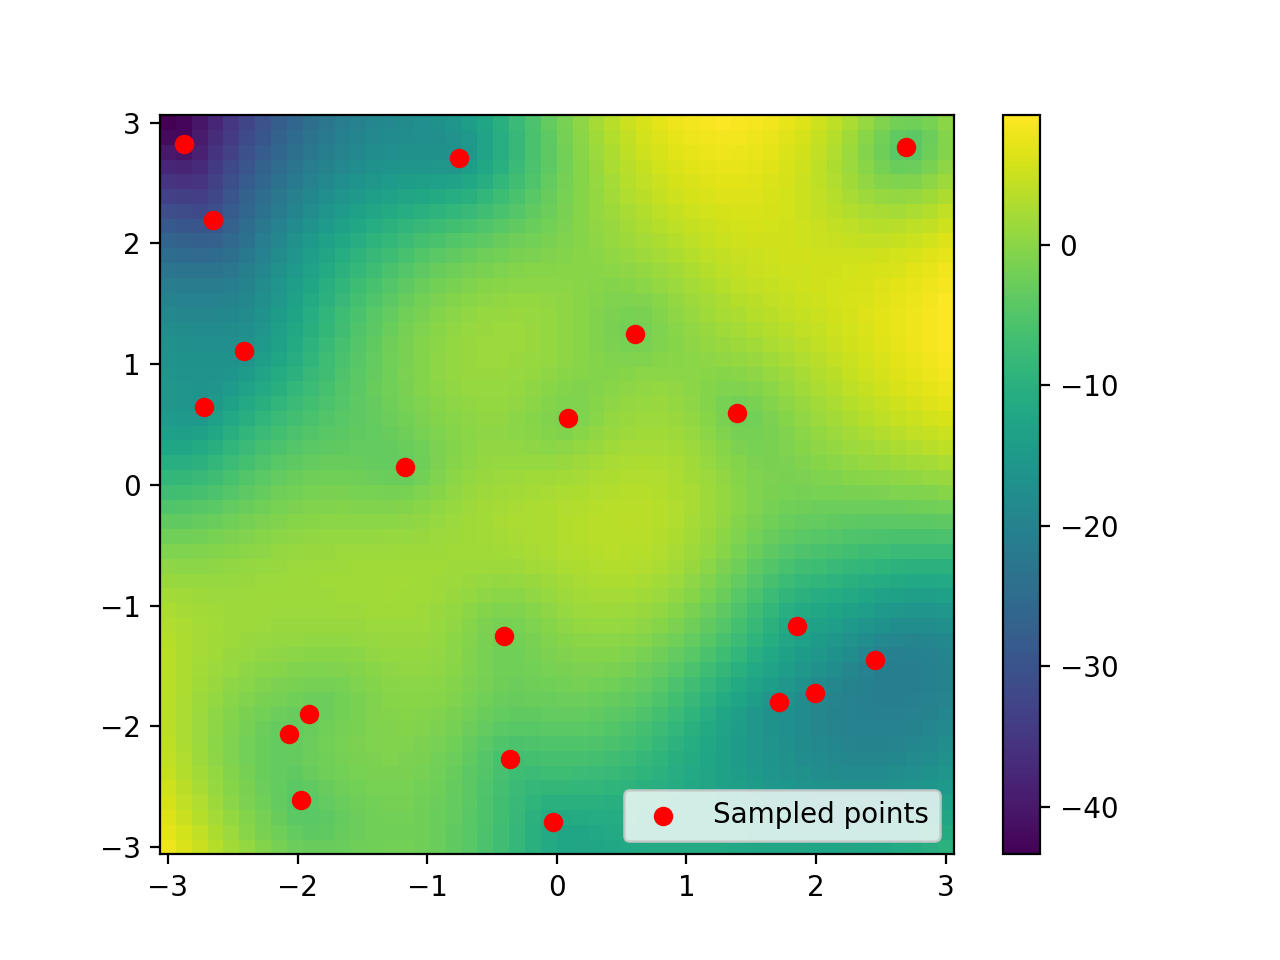

In [4]:
Z_acq = grid.surrogate_predict(plot_points, kappa=grid.kappa).reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, Z_acq, shading='auto')
plt.colorbar()
plt.scatter(grid.positions['x'], grid.positions['y'], c='red', label='Sampled points')
plt.legend()
plt.show()

## Visualise the current surrogate model

<IPython.core.display.Javascript object>


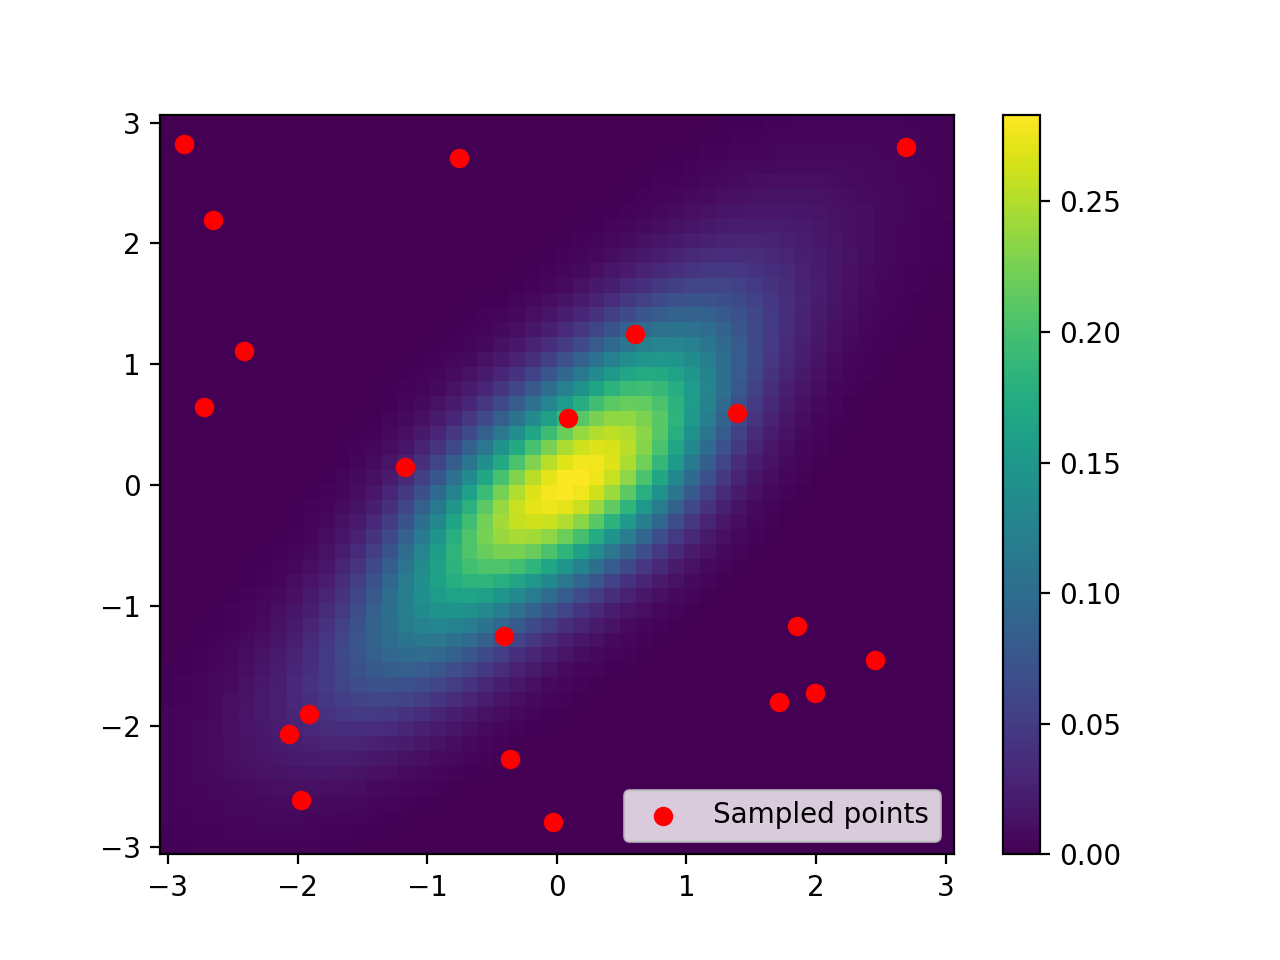

In [5]:
Z_surrogate = grid.surrogate_predict(plot_points).reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, np.exp(Z_surrogate), shading='auto')
plt.colorbar()
plt.scatter(grid.positions['x'], grid.positions['y'], c='red', label='Sampled points')
plt.legend()
plt.show()

# 3. Sample the acquisition function a few times

In [6]:
grid.run_batches(Nmcmc=5, batch_size=20)

2021-04-25 17:55:59.539946: sampling the acquisition function.


2843it [00:28, 101.47it/s, +500 | bound: 12 | nc: 1 | ncall: 27787 | eff(%): 12.031 | loglstar:   -inf <  9.228 <    inf | logz:  4.276 +/-  0.139 | dlogz:  0.001 >  0.509]


2021-04-25 17:56:28.130256: evaluating 20 samples.
2021-04-25 17:56:28.137608: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-25 17:56:28.166780: sampling the acquisition function.


2227it [00:13, 168.20it/s, +500 | bound: 2 | nc: 1 | ncall: 18809 | eff(%): 14.498 | loglstar:   -inf <  2.014 <    inf | logz: -1.840 +/-  0.116 | dlogz:  0.001 >  0.509]


2021-04-25 17:56:41.717651: evaluating 20 samples.
2021-04-25 17:56:41.726372: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-25 17:56:41.780541: sampling the acquisition function.


1668it [00:10, 155.71it/s, +500 | bound: 0 | nc: 1 | ncall: 15079 | eff(%): 14.378 | loglstar:   -inf < -0.523 <    inf | logz: -3.179 +/-  0.076 | dlogz:  0.001 >  0.509]


2021-04-25 17:56:52.845407: evaluating 20 samples.
2021-04-25 17:56:52.852574: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-25 17:56:52.962395: sampling the acquisition function.


1449it [00:08, 174.59it/s, +500 | bound: 0 | nc: 1 | ncall: 10222 | eff(%): 19.067 | loglstar:   -inf < -1.228 <    inf | logz: -3.296 +/-  0.063 | dlogz:  0.001 >  0.509]


2021-04-25 17:57:01.605563: evaluating 20 samples.
2021-04-25 17:57:01.612317: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-25 17:57:01.735508: sampling the acquisition function.


1563it [00:10, 145.72it/s, +500 | bound: 0 | nc: 1 | ncall: 10880 | eff(%): 18.961 | loglstar:   -inf < -1.276 <    inf | logz: -3.561 +/-  0.073 | dlogz:  0.001 >  0.509]


2021-04-25 17:57:12.732926: evaluating 20 samples.
2021-04-25 17:57:12.739247: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
Terminating, number of requested iterations reached.
2021-04-25 17:57:12.880888: sampling the surrogate model.


1534it [00:10, 139.48it/s, +500 | bound: 0 | nc: 1 | ncall: 11737 | eff(%): 17.330 | loglstar:   -inf < -1.329 <    inf | logz: -3.551 +/-  0.068 | dlogz:  0.001 >  0.509]

Output saved at ./out/test_model/.


## Visualise the results

In [7]:
# Load the surrogate samples results
samples = np.load('./out/test_model/surrogate_samples.npy')

with open('./out/test_model/logz.txt', 'r') as f:
    logz = float(f.read())

In [8]:
Xsamples = np.vstack([samples[p] for p in grid.params]).T

print('Mean:')
print(np.mean(Xsamples, axis=0))
print('Covariance:')
print(np.cov(Xsamples, rowvar=False))
print('Evidence:')
print(np.exp(logz))

Mean:
[0.03363697 0.00080249]
Covariance:
[[0.98562166 0.79785451]
 [0.79785451 0.97993343]]
Evidence:
1.0333452889918142


So not so bad for only $120$ point sampled from the expensive posterior:

<IPython.core.display.Javascript object>


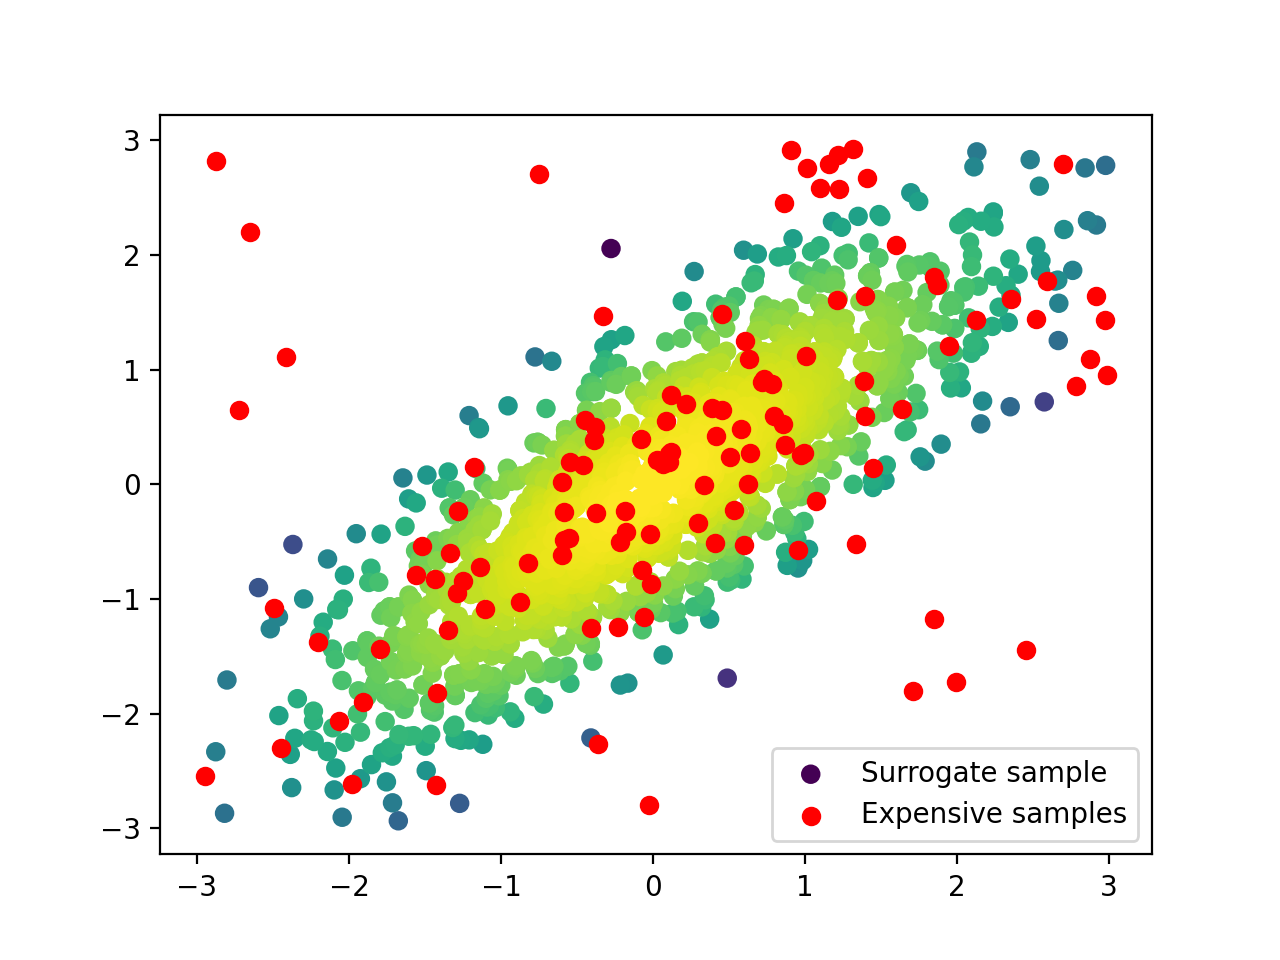

In [9]:
plt.figure()
plt.scatter(samples['x'], samples['y'], c=samples['target'], label='Surrogate sample')
plt.scatter(grid.positions['x'], grid.positions['y'], c='red', label='Expensive samples')
plt.legend()
plt.show()